# Analysis

In this notebook we will analyse the models that we created.

The analysis consists of:

1) comparing the perplexity and the accuracy between the rationalized and non-rationalized model 

2) Checking the change in perplexity when removing even more from the rational

3) Checking the distribution of rationals

4) Qualitative analysis of the some examples

## Setup

In [1]:
#First we fix the relative imports
import os
import sys
# M
# module_path = os.path.abspath(os.path.join('..'))
# if module_path not in sys.path:
#     sys.path.append(module_path)
    
#Make sure we are in the top folder. 
os.chdir(os.path.join('..'))

In [2]:
### We load the models based on the configs for analysis. 
from utils.analysis import parse_config_for_analysis

name = "Random 10"

config_path = 'configs/random_10_RE_config.yml'

loaded_info = parse_config_for_analysis(config_path)


C:\Users\gerso\projects\rational-dialog-model\utils\analysis.py:26: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


./daily_dialog/tokenizer.json
200


Using custom data configuration default
Reusing dataset daily_dialog (C:\Users\gerso\.cache\huggingface\datasets\daily_dialog\default\1.0.0\c03444008e9508b8b76f1f6793742d37d5e5f83364f8d573c2747bff435ea55c)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores


load pretrained_model:  ./models/small_lm.pt
load pretrained_model:  ./models/small_lm_token_random_10_rationalized.pt
2


## Perplexity and Accuracy

In [3]:
lm_RE = loaded_info["lightning_language_model_RE"].to("cuda")
lm = loaded_info["lightning_language_model_no_RE"].to("cuda")
tokenizer = loaded_info["tokenizer"]
dataloader_test = loaded_info["dataloader_test"]



In [4]:
### First thing we compare the perplexity and accuracy on the testset.
from utils.analysis import get_results, get_results_RE


lm_RE_result = get_results_RE(lm_RE, dataloader_test, 1)
lm_result = get_results(lm, dataloader_test)
print(lm_RE_result)
print(lm_result)


  0%|                                                                                                                                                                                                               | 0/184 [00:00<?, ?it/s]C:\Users\gerso\anaconda3\envs\CDM\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 184/184 [00:01<00:00, 172.33it/s]

{'mean_acc': {'mean': 0.3646211108640394, 'std': 0.0}, 'mean_perplexity': {'mean': 31.209163190557327, 'std': 0.0}, 'mean_mask_percentage': {'mean': 0.10005078404898377, 'std': 0.0}}
{'mean_acc': 0.38537945775372195, 'mean_perplexity': 25.526450388929813, 'mean_mask_percentage': 0}


## Change in perplexity

In [5]:
### Next we test what happens if we check te change in perplexity of the RE. 
# from utils.analysis import calc_change_in_perplexity_experiment
# change_in_perplexity = calc_change_in_perplexity_experiment(lm_RE, dataloader_test, n_experiments=10, n_extra_mask=2)
# change_in_perplexity

## Distribution of mask

In [6]:
from utils.analysis import rational_analysis, prepare_rel_pos_count, add_distribution_to_file

rational_distributions = rational_analysis(lm_RE, dataloader_test, greedy=False)
print(rational_distributions)

rel_pos_count = prepare_rel_pos_count(rational_distributions["rel_pos_count"])
add_distribution_to_file(rel_pos_count, name, file="pos_counts.txt")

{'abs_average': 0.0, 'rel_average': 0.0, 'abs_pos_count': Counter({2.0: 592, 14.0: 590, 1.0: 588, 3.0: 585, 9.0: 575, 13.0: 574, 4.0: 573, 5.0: 571, 8.0: 560, 10.0: 555, 6.0: 551, 7.0: 551, 11.0: 548, 12.0: 524, 16.0: 522, 19.0: 518, 15.0: 498, 20.0: 490, 18.0: 487, 23.0: 483, 17.0: 476, 21.0: 474, 25.0: 464, 22.0: 461, 29.0: 461, 27.0: 450, 31.0: 450, 26.0: 429, 24.0: 427, 36.0: 424, 28.0: 423, 30.0: 418, 34.0: 417, 35.0: 410, 32.0: 404, 39.0: 403, 38.0: 395, 43.0: 393, 42.0: 390, 37.0: 380, 45.0: 376, 33.0: 373, 40.0: 364, 41.0: 364, 44.0: 358, 48.0: 331, 46.0: 322, 47.0: 322, 52.0: 322, 54.0: 317, 56.0: 316, 51.0: 310, 49.0: 308, 55.0: 308, 53.0: 306, 62.0: 306, 57.0: 303, 59.0: 301, 50.0: 300, 61.0: 290, 58.0: 288, 60.0: 285, 63.0: 274, 66.0: 272, 69.0: 260, 64.0: 258, 65.0: 257, 67.0: 255, 68.0: 246, 70.0: 241, 74.0: 238, 71.0: 236, 76.0: 230, 75.0: 228, 78.0: 219, 73.0: 218, 84.0: 206, 77.0: 205, 72.0: 201, 83.0: 195, 80.0: 189, 86.0: 188, 82.0: 185, 79.0: 184, 81.0: 183, 88.0: 1

,percentages,Random 50,Policy token,Gumbel,Kuma,Random 25,Random 10
0,0,0.042572,0.042394,0.308248,0.133743,0.043254,0.041327
1,10,0.100014,0.100498,0.212583,0.288562,0.099790,0.097448
2,20,0.101309,0.104503,0.080472,0.178922,0.102238,0.102837
3,30,0.098195,0.098656,0.034567,0.094549,0.098541,0.096878
4,40,0.101381,0.102879,0.021705,0.064816,0.099501,0.099365
5,50,0.099264,0.101125,0.015971,0.043323,0.100141,0.099184
6,60,0.100009,0.101597,0.012440,0.033283,0.100338,0.102189
7,70,0.097445,0.097965,0.012699,0.023348,0.098097,0.100143
8,80,0.102173,0.101892,0.019308,0.021798,0.101050,0.101853
9,90,0.099922,0.098183,0.045711,0.027541,0.100193,0.100713


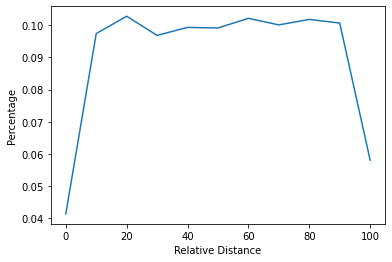

In [7]:
import matplotlib.pyplot as plt
relative_counts = rational_distributions["rel_pos_count"]
total = sum(relative_counts.values())
X = [int(k) for k in relative_counts.keys()] 
Y = [r/total for r in relative_counts.values()]

pairs = sorted([(x,y) for x,y in zip(X, Y)], key=lambda p: p[0])
plt.xlabel
X_sorted = [p[0] for p in pairs]
Y_sorted = [p[1] for p in pairs]
plt.xlabel("Relative Distance")
plt.ylabel("Percentage")
plt.plot(X_sorted, Y_sorted, "")


<BarContainer object of 11 artists>

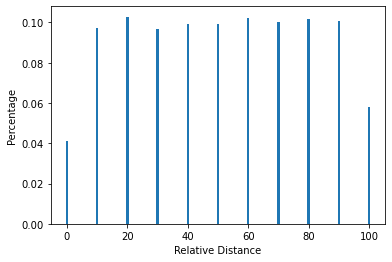

In [8]:
plt.xlabel("Relative Distance")
plt.ylabel("Percentage")
plt.bar(X, Y)

<BarContainer object of 192 artists>

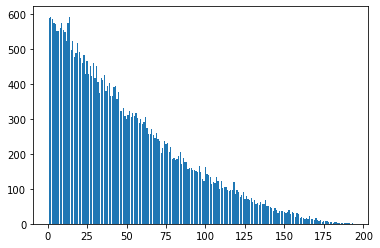

In [9]:
abs_pos_count = rational_distributions["abs_pos_count"]
plt.bar(abs_pos_count.keys(),abs_pos_count.values())

## Analysing some examples

In [10]:
examples = ["How are you doing? [SEP]", "What did you do today? [SEP]", "How's work? [SEP]", "Would you like some coffee? [SEP]"]

In [11]:
## First with greedy rationals
completed_dialogues_chance = lm_RE.complete_dialogues(examples, total_length=40, greedy_rationals=False)
completed_dialogues_greedy = lm_RE.complete_dialogues(examples, total_length=40, greedy_rationals=True)

In [12]:
from utils.analysis import pretty_print_completed_dialogues

In [13]:
pretty_print_completed_dialogues(completed_dialogues_greedy)

context ----> response
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ------> oh , good , thanks . [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ------> what is the problem ? [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [SEP] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] what [MASK] [MASK] [MASK] ? [MASK] ------> yes , please . [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] . [SEP] ------> i am . [SEP]
[MASK] [MASK] [MASK] [MASK] ? [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] yes [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ------> no , i ’ ve got the wrong teacher . [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] oh , good [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] the [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] i 

In [14]:
pretty_print_completed_dialogues(completed_dialogues_chance)

context ----> response
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ------> yes . [SEP]
[MASK] [MASK] you [MASK] [MASK] [MASK] yes [MASK] [MASK] ------> what do you like ? [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] you [MASK] [MASK] [MASK] ------> i ' m afraid you are right . [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [SEP] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ------> i am not sure . what did you do ? [SEP]
how [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] i [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ------> how did you know that ? [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ------> what ' s your favorite course ? [SEP]
what [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK]

In [15]:
completed_dialogues_chance[0]

{'completed_dialogue': "how are you doing ? [SEP] yes . [SEP] what do you like ? [SEP] i ' m afraid you are right . [SEP] i am not sure . what did you do ? [SEP] how did you know that ? [SEP]",
 'rationals': [tensor([False, False, False, False, False, False], device='cuda:0'),
  tensor([False, False,  True, False, False, False,  True, False, False],
         device='cuda:0'),
  tensor([False, False, False, False, False, False, False, False, False, False,
          False,  True, False, False, False], device='cuda:0'),
  tensor([False, False, False, False, False, False, False, False,  True, False,
          False, False, False, False, False, False, False, False, False, False,
          False, False, False, False], device='cuda:0'),
  tensor([ True, False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False, False,
          False, False, False, False,  True, False, False, False, False, False,
          False, Fal